In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore')

In [7]:
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

In [58]:
train = pd.read_csv(r'E:\InnoDaat\TitanicProject\train.csv')
test =  pd.read_csv(r'E:\InnoDaat\TitanicProject\test.csv')

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
train.shape

(891, 12)

In [63]:
# 19% Null values in the Age columns
(train['Age'].isnull().sum()/train.shape[0])*100

19.865319865319865

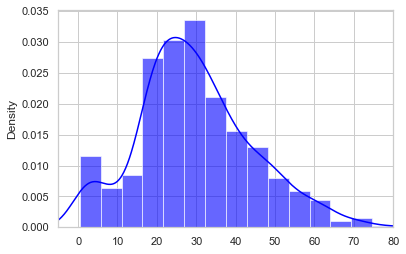

In [64]:
train['Age'].hist(bins=15 , color='blue',density=True, stacked=True, alpha=0.6 )
train['Age'].plot(kind='density',color='blue')
plt.xlim(-5,80)
plt.show()

In [65]:
# 77% Null values in the Age columns
(train['Cabin'].isnull().sum()/train.shape[0])*100

77.10437710437711

In [66]:
# 0.22% Null values in the Age columns
(train['Embarked'].isnull().sum()/train.shape[0])*100

0.22446689113355783

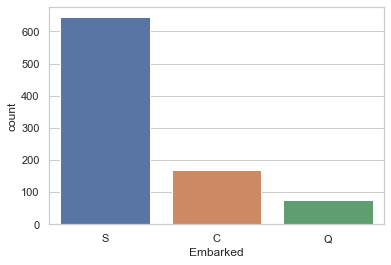

In [67]:
train['Embarked'].value_counts()
sns.countplot(x='Embarked',data=train)
plt.show()

In [68]:
train['Age'].fillna(train['Age'].median(skipna=True),inplace=True)
train['Embarked'].fillna(train['Embarked'].value_counts().idxmax(),inplace=True)

In [69]:
train.drop('Cabin',inplace=True,axis=1)

In [70]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [71]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [72]:
train['TravelAlone']  = np.where((train['SibSp'] + train['Parch']) > 0,0,1)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [74]:
train.drop(['SibSp','Parch'],axis=1,inplace=True)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [76]:
trainning = pd.get_dummies(train , columns=['Pclass','Embarked','Sex'])

In [78]:
trainning.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,1,0,1


In [79]:
trainning.drop(['Name','Ticket',],axis=1,inplace=True)

In [80]:
trainning.head(2)

,PassengerId,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,22.0,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,38.0,71.2833,0,1,0,0,1,0,0,1,0


In [83]:
trainning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   Fare         891 non-null    float64
 4   TravelAlone  891 non-null    int32  
 5   Pclass_1     891 non-null    uint8  
 6   Pclass_2     891 non-null    uint8  
 7   Pclass_3     891 non-null    uint8  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
 11  Sex_female   891 non-null    uint8  
 12  Sex_male     891 non-null    uint8  
dtypes: float64(2), int32(1), int64(2), uint8(8)
memory usage: 38.4 KB


In [81]:
test['Age'].fillna(test['Age'].median(skipna=True),inplace=True)
test['Embarked'].fillna(test['Embarked'].value_counts().idxmax(),inplace=True)
test.drop('Cabin',inplace=True,axis=1)
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [84]:
test['TravelAlone']  = np.where((test['SibSp'] + test['Parch']) > 0,0,1)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [86]:
testing = pd.get_dummies(test , columns=['Pclass','Embarked','Sex'])
testing.drop(['Name','Ticket',],axis=1,inplace=True)

In [111]:
testing.isna().sum()
testing['Fare'].fillna(testing['Fare'].median(skipna=True),inplace=True)

In [112]:
testing.isna().sum()

PassengerId    0
Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [87]:
testing.head(2)

,PassengerId,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,34.5,7.8292,1,0,0,1,0,1,0,0,1
1,893,47.0,7.0000,0,0,0,1,0,0,1,1,0


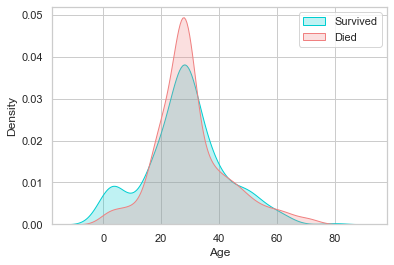

In [88]:
sns.kdeplot(trainning['Age'][trainning['Survived']==1] ,color='darkturquoise',shade=True)
sns.kdeplot(trainning['Age'][trainning['Survived']==0] ,color='lightcoral',shade=True)
plt.legend(['Survived','Died'])

In [115]:
trainning['IsMinor'] = np.where(trainning['Age']<=16,1,0)
testing['IsMinor'] = np.where(test['Age']<=16,1,0)

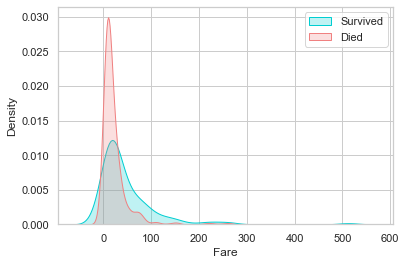

In [90]:
sns.kdeplot(trainning['Fare'][trainning['Survived']==1] ,color='darkturquoise',shade=True)
sns.kdeplot(trainning['Fare'][trainning['Survived']==0] ,color='lightcoral',shade=True)
plt.legend(['Survived','Died'])

### Applying Logistic Regression

In [91]:
trainning

,PassengerId,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,IsMinor
0,1,0,22.0,7.2500,0,0,0,1,0,0,1,0,1,0
1,2,1,38.0,71.2833,0,1,0,0,1,0,0,1,0,0
2,3,1,26.0,7.9250,1,0,0,1,0,0,1,1,0,0
3,4,1,35.0,53.1000,0,1,0,0,0,0,1,1,0,0
4,5,0,35.0,8.0500,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,13.0000,1,0,1,0,0,0,1,0,1,0
887,888,1,19.0,30.0000,1,1,0,0,0,0,1,1,0,0
888,889,0,28.0,23.4500,0,0,0,1,0,0,1,1,0,0
889,890,1,26.0,30.0000,1,1,0,0,1,0,0,0,1,0


In [131]:
testing.shape
testing.columns

Index(['PassengerId', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'IsMinor'],
      dtype='object')

In [132]:
trainning.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'IsMinor'],
      dtype='object')

In [133]:
col = ['Age', 'Fare', 'TravelAlone', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'IsMinor']
X = trainning[col]
y = trainning['Survived']

In [134]:
X_test_dataset = testing[col]

<AxesSubplot:>

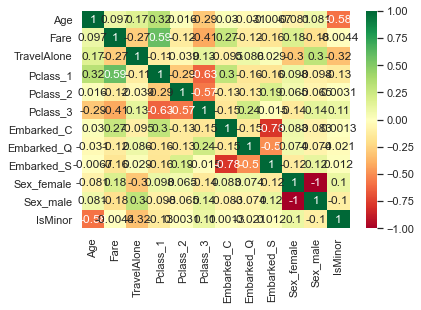

In [135]:
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')

In [136]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X,y)

LogisticRegression()

In [139]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score,classification_report
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)
X_train.shape

(712, 12)

In [140]:
y_train.shape

(712,)

In [141]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [143]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [145]:
np.array(y_test)

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [147]:
### More Experiment

In [150]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
y_pred_proba = reg.predict_proba(X_test)
y_pred_proba = reg.predict_proba(X_test)[:,1]

In [152]:
cutoff = 0.6
correct = 0
for i in range(y_pred_proba.shape[0]):
    pred =0
    if y_pred_proba[i] > cutoff:
        pred =1
    actual = y_test.values[i]
    if pred == actual:
        correct +=1
print(correct/y_pred_proba.shape[0])
    

0.8547486033519553


In [155]:
from sklearn.metrics import roc_curve
[fpr,tpr,thr ] = roc_curve(y_test,y_pred_proba)

In [156]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.8759994485800938

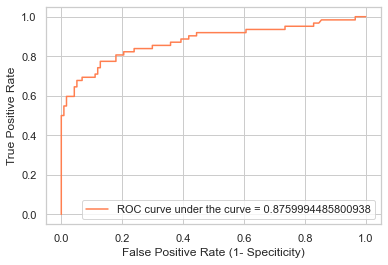

In [159]:
plt.figure()
plt.plot(fpr,tpr,color='coral',label= 'ROC curve under the curve = '+str(auc(fpr,tpr)))
plt.xlabel('False Positive Rate (1- Speciticity)')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<AxesSubplot:>

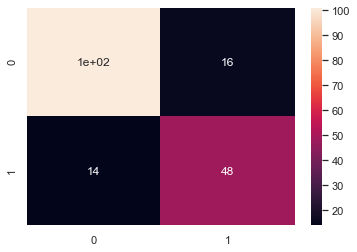

In [160]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [161]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[101,  16],
       [ 14,  48]], dtype=int64)